# **Import Necessary Library**

In [ ]:


# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf
from tqdm import tqdm # for progress bar

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow import keras

# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")


from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

Importing libraries completed.


# **Load the MNIST dataset**

In [ ]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
train_X.shape

4422102/4422102 [==============================] - 2s 0us/step


(60000, 28, 28)

In [ ]:
CLASS_NAME = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
# vgg16 doesn't support 28x28 images, it should at least 32x32 so padding needed

x_train = np.array([np.pad(train_X[i],2,mode='constant') for i in range(train_X.shape[0])])
x_test = np.array([np.pad(test_X[i],2,mode='constant') for i in range(test_X.shape[0])])


x_train.shape, x_test.shape


((60000, 32, 32), (10000, 32, 32))

In [ ]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# Convert Data to 3 Channel
x_train=np.stack((x_train,)*3, axis=-1)
x_test=np.stack((x_test,)*3, axis=-1)
x_train.shape

(60000, 32, 32, 3)

In [ ]:
y_train = train_y
y_test = test_y
train_X = x_train
test_X  = x_test

## **Show Images Sample**

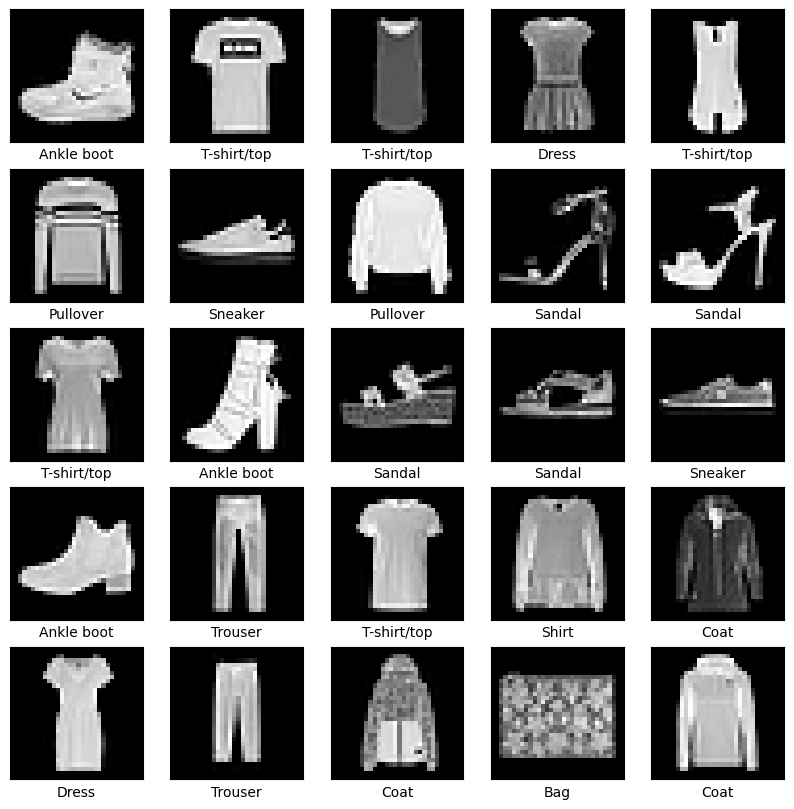

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(CLASS_NAME[y_train[i]])
plt.show()



In [ ]:
# Convert the labels to categorical one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# **Use Tensorboard for training Visualization**

In [ ]:
%load_ext tensorboard

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [ ]:
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


# **Design Network Layer with VGG16 pretrained model**

In [ ]:
# TL Model
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
model=Sequential()
model.add(VGG16(include_top=False, pooling='avg', weights='imagenet',input_shape=(32,32,3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Set Resnet Layers not trainable
model.layers[0].trainable=False

model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,982,474
Trainable params: 267,786
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test),callbacks=[tensorboard_callback],verbose=1)

Epoch 1/30


ValueError: ignored

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy = {:.2f}%".format(round(test_acc*100, 2)))

# **Evaluation The Output**

In [ ]:
# visualize the training and loss function
%tensorboard --logdir logs/fit

In [ ]:
predicted = model.predict(test_X)

In [ ]:
predicted[:10]

NameError: ignored

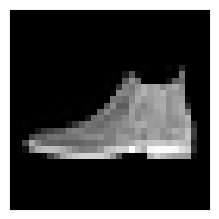

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel("real="+str(y_test[i])+", "+"predicted="+str(np.argmax(predicted[i])))

    color = 'blue'
    if np.argmax(predicted[i]) != y_test[i]:
      color = 'red'

    plt.xlabel("{} acc={:2.0f}% ({})".format("predicted="+str(np.argmax(predicted[i]))+" ",
                                100*np.max(predicted[i]),
                                str(y_test[i]),
                                color=color))

plt.show()



## **Show the ground truth in Confusion Matrix**

In [ ]:
predicted.shape, test_y.shape

NameError: ignored

In [ ]:
pred=np.array([np.argmax(predicted[i]) for i in range(predicted.shape[0])])

NameError: ignored

In [ ]:
pred[:10], test_y[:10]

NameError: ignored

In [ ]:
pred.shape, test_y.shape

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = test_y

confusion_matrix = metrics.confusion_matrix(actual, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, False])

cm_display.plot()
plt.show()

NameError: ignored